<h1>Linear Regression Multiple Outputs</h1> 


<h2>Objective</h2><ul><li> How to create a complicated models using PyTorch build in functions.</li></ul> 


<h2>Table of Contents</h2>
<p>In this lab, you will create a model the PyTorch way. This will help you more complicated models.</p>

<ul>
    <li><a href="#Makeup-Data">Make Some Data</a></li>
    <li><a href="#Model_Cost">Create the Model and Cost Function the PyTorch way</a></li>
    <li><a href="#BGD">Train the Model: Batch Gradient Descent</a></li>
</ul>

<h2>Preparation</h2>


We'll need the following libraries:


In [1]:
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import warnings

warnings.filterwarnings("ignore")

Set the random seed:


In [2]:
torch.manual_seed(1)

Use this function for plotting: 


In [15]:
def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    x1 = dataset.x[:, 0].view(-1, 1).numpy()
    x2 = dataset.x[:, 1].view(-1, 1).numpy()
    y = dataset.y.numpy()

    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

<a name="Makeup-Data"><h2 id=" #Makeup-Data" > Make Some Data </h2></a>


Create a dataset class with two-dimensional features:


In [4]:
class Data2D(Dataset):
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b    
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    def __getitem__(self, index):          
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

Create a dataset object:


In [5]:
data_set = Data2D()

<a name="Model_Cost"><h2 id="Model_Cost">Create the Model, Optimizer, and Total Loss Function (Cost)</h2></a>


Create a customized linear regression module: 


In [7]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

Create a model. Use two features: make the input size 2 and the output size 1: 


In [8]:
model = LinearRegression(2, 1)
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.6209, -0.1178]], requires_grad=True), Parameter containing:
tensor([0.3026], requires_grad=True)]


Create an optimizer  object. Set the learning rate to 0.1. <b>Don't forget to enter the model parameters in the constructor.</b>


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter2/2.6.2paramater_hate.png" width="100" alt="How the optimizer works">


In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

Create the criterion function that calculates the total loss or cost:


In [10]:
criterion = nn.MSELoss()

Create a data loader object. Set the batch_size equal to 2: 


In [11]:
train_loader = DataLoader(dataset=data_set, batch_size=2)

<a name="BGD"><h2 id="BGD">Train the Model via Mini-Batch Gradient Descent</h2></a>


Run 100 epochs of Mini-Batch Gradient Descent and store the total loss or cost for every iteration. Remember that this is an approximation of the true total loss or cost:


Before Training: 


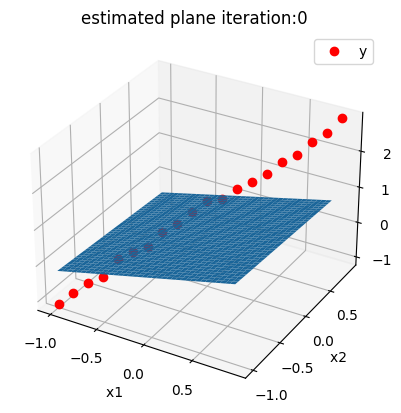

After Training: 


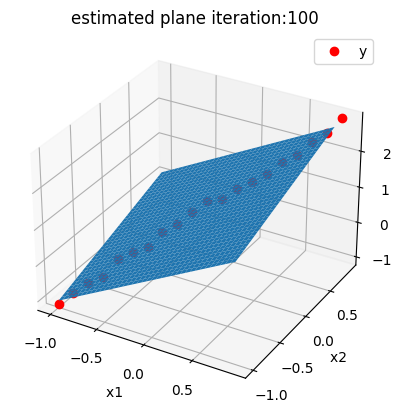

In [16]:
LOSS = []
print("Before Training: ")
Plot_2D_Plane(model, data_set)
epochs = 100
   
def train_model(epochs):    
    for epoch in range(epochs):
        for x, y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

train_model(epochs)
print("After Training: ")
Plot_2D_Plane(model, data_set, epochs)  

Text(0, 0.5, 'Cost/total loss ')

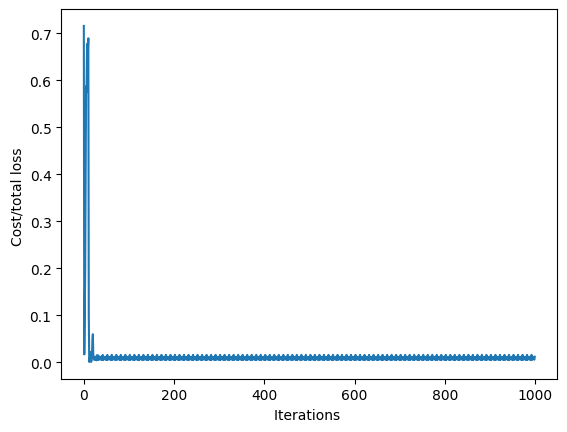

In [17]:
plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")

<h3>Practice</h3>


Create a new <code>model1</code>. Train the model with a batch size 10 and learning rate 0.1, store the loss or total cost in a list <code>LOSS1</code>, and plot the results.


Before training


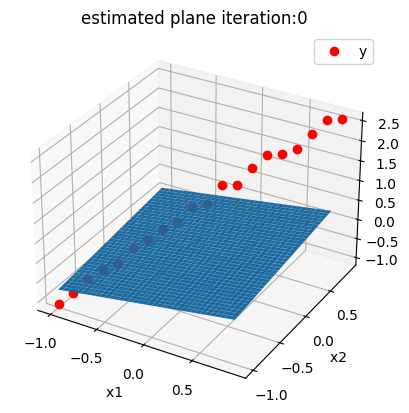

Before training


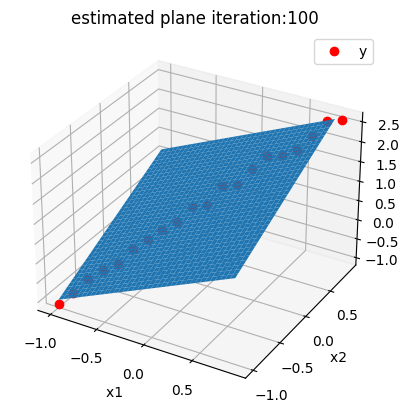

In [21]:
# Practice create model1. Train the model with batch size 10 and learning rate 0.1, store the loss in a list <code>LOSS1</code>. Plot the results.

dataset = Data2D()
data = DataLoader(dataset=dataset, batch_size=10)
model1 = LinearRegression(2, 1)
optimizer1 = optim.SGD(model1.parameters(), lr=0.1)
epochs = 100
LOSS1 = []

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in data:
            yhat = model1(x)
            loss = criterion(yhat, y)
            LOSS1.append(loss.item())
            optimizer1.zero_grad()
            loss.backward()
            optimizer1.step()

print('Before training')
Plot_2D_Plane(model1, dataset)
train_model(epochs)
print('Before training')
Plot_2D_Plane(model1, dataset, epochs)

Text(0, 0.5, 'Cost/total loss ')

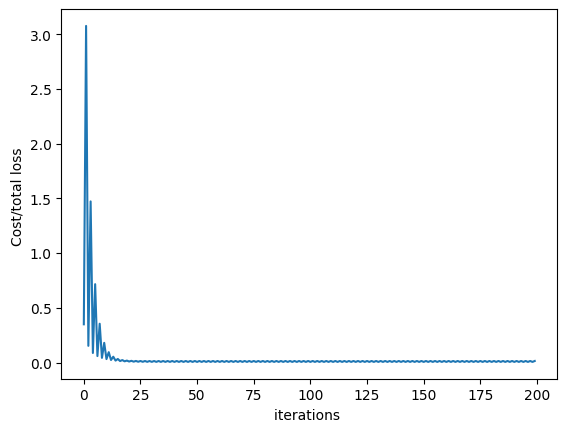

In [22]:
plt.plot(LOSS1)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")

Use the following validation data to calculate the total loss or cost for both models:


In [23]:
torch.manual_seed(2)

validation_data = Data2D()
Y = validation_data.y
X = validation_data.x

yhat = model(X)
model_loss = criterion(yhat, Y)

yhat = model1(X)
model_loss1 = criterion(yhat, Y)

model_loss, model_loss1

(tensor(0.0081, grad_fn=<MseLossBackward0>),
 tensor(0.0093, grad_fn=<MseLossBackward0>))